# Mindspore introduction

In [1]:
import mindspore

In [2]:
import numpy as np
from mindspore import Tensor
from mindspore import dtype

In [3]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [4]:
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y

Tensor(shape=[], dtype=Int32, value= 1)

In [5]:
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

In [6]:
n = Tensor((1,2,3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

In [7]:
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [ 4.00000000e+00,  5.00000000e+00,  6.00000000e+00])

In [8]:
from mindspore import ops
oneslike = ops.OnesLike()
x = Tensor(np.array([[0,1],[2,1]]).astype(np.int32))
output  = oneslike(x)
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

In [9]:
from mindspore.ops import operations as ops

shape = (2,2)
ones = ops.Ones()
output = ones(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 1.00000000e+00,  1.00000000e+00],
 [ 1.00000000e+00,  1.00000000e+00]])

In [10]:
zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00]])

In [11]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)

# x.shape
x.ndim
# x.size
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [12]:
y = Tensor(np.array([[True, True],[False, False]]), dtype.bool_)

y_array = y.asnumpy()

y

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

In [13]:
tensor = Tensor(np.array([[0,1],[2,3]]).astype(np.float32))
print("First row: {}, First column: {}, Last Column: {}".format(tensor[0], tensor[:,0], tensor[...,-1]))

First row: [0. 1.], First column: [0. 2.], Last Column: [1. 3.]


In [14]:
data1 = Tensor(np.array([[0,1], [2,3]]).astype(np.float32))
data2 = Tensor(np.array([[4,5],[6,7]]).astype(np.float32))
op = ops.Stack()
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


zeros = ops.Zeros()
output = zeros((2,2), dtype.float32)
print("output: {}".format(type(output)))
n_output = output.asnumpy()
print("n_output: {}".format(type(n_output)))

## Loading a Dataset

In [15]:
import os 
import mindspore.dataset as ds
import matplotlib.pyplot as plt

In [16]:
dataset_dir = "CUT/MNIST/train"
mnist_dataset = ds.MnistDataset(dataset_dir = dataset_dir, num_samples=3)

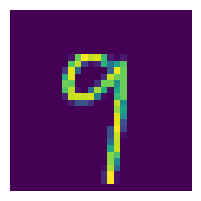

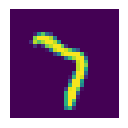

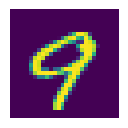

In [17]:
plt.figure(figsize=(8,8))
i=1
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic["image"][:,:,0])
    plt.axis("off")
    i += 1
    plt.show()

### Customize a dataset 

In [18]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
    def __init__(self):
        self._data = np.random.sample((5, 2))
        self._label = np.random.sample((5, 1))

    def __getitem__(self, index):
        return self._data[index], self._label[index]

    def __len__(self):
        return len(self._data)   

dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle = False)



In [19]:
for data in dataset.create_dict_iterator():
    print("{}".format(data["data"]), "{}".format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


### Perform data augmentation

In [20]:
ds.config.set_seed(58)

dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(batch_size=2)

for data in dataset.create_dict_iterator():
    print("data {}".format(data["data"]), "label {}".format(["label"])) 

data [[0.36510558 0.45120592]
 [0.57176158 0.28963401]] label ['label']
data [[0.30880446 0.37487617]
 [0.49606035 0.07562207]] label ['label']
data [[0.81585667 0.96883469]] label ['label']


Text(0.5, 1.0, '5')

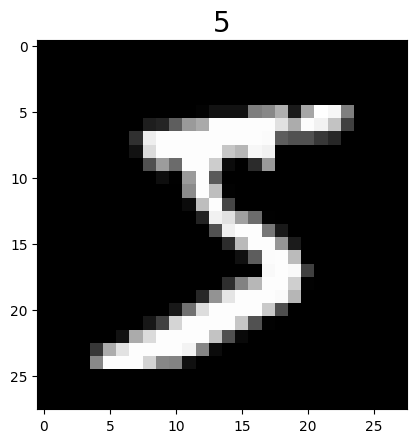

In [21]:
import matplotlib.pyplot as plt 

# from mindspore.dataset.vision import inter
import mindspore.dataset.vision.c_transforms as c_vision

DATA_DIR = "CUT/MNIST/train"

mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)
mnist_it = mnist_dataset.create_dict_iterator()
data = next(mnist_it)

plt.imshow(data["image"].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data["label"].asnumpy(), fontsize=20)


## Building the network

### Build a fully connected layer

In [22]:
import mindspore as ms 
import mindspore.nn as nn
from mindspore import Tensor
import numpy as np

#construct the input tensor
input_a = Tensor(np.array([[1,1,1],[2,2,2]]), ms.float32)
print(input_a)

#Construct a fully-connected network, settings both in_channels and out channels to 2
net = nn.Dense(in_channels = 3, out_channels=3, weight_init = 1)
output = net(input_a)
print(output)


[[1. 1. 1.]
 [2. 2. 2.]]
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


### Build a convolutional layer

In [23]:
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode = 'valid')
input_x = Tensor(np.ones([1,1,32,32]), ms.float32)
print(conv2d(input_x).shape)

(1, 6, 28, 28)


### Build a ReLU layer

In [48]:
relu = nn.ReLU()
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)
output = relu(input_x)

print(output)

[0. 2. 0. 2. 0.]


### Build a pooling layer

In [25]:
max_pool2D = nn.MaxPool2d(kernel_size=2, stride=2)
input_x = Tensor(np.ones([1,6,28,28]), ms.float32)

print(max_pool2D(input_x).shape)

(1, 6, 14, 14)


### Build a flatten layer

In [26]:
flatten = nn.Flatten()
input_x = Tensor(np.ones([1,16,5,5]), ms.float32)
output = flatten(input_x)

print(output.shape)

(1, 400)


### Define a model class and view parameters

In [49]:
import mindspore.nn as nn

class LeNet5(nn.Cell):
    """
    LeNet Network Structure - Fixed version
    """
    def __init__(self, num_class=10, num_channel=1):
        super(LeNet5, self).__init__()
        # Fixed: Changed from 15 to 16 output channels for conv2
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        
        # Calculate correct input size for fc1
        # Input: 28x28 -> conv1(5x5) -> 24x24 -> pool -> 12x12
        # -> conv2(5x5) -> 8x8 -> pool -> 4x4
        # So: 16 * 4 * 4 = 256
        self.fc1 = nn.Dense(16 * 4 * 4, 120)
        self.fc2 = nn.Dense(120, 84)
        self.fc3 = nn.Dense(84, num_class)
        
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        
    def construct(self, x):
        #Use the defined operations to build a feedforward network.
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
        
# Instantiate and test
modelle = LeNet5()
for name, param in modelle.parameters_and_names():
    print(name, param.shape)


conv1.weight (6, 1, 5, 5)
conv2.weight (16, 6, 5, 5)
fc1.weight (120, 256)
fc1.bias (120,)
fc2.weight (84, 120)
fc2.bias (84,)
fc3.weight (10, 84)
fc3.bias (10,)


### Training and Validating the model

In [50]:
import numpy as np
import mindspore.nn as nn 
from mindspore import Tensor 
import mindspore.dataset as ds
import mindspore as ms

loss = nn.L1Loss()
output_data = Tensor(np.array([[1,2,3],[2,3,4]]).astype(np.float32))
target_data = Tensor(np.array([[0,2,5], [3,1,1]]).astype(np.float32))
print(loss(output_data, target_data))

1.5


### Use na optmiser

In [51]:
optim = nn.Momentum(params=modelle.trainable_params(), learning_rate=0.1, 
                    momentum=0.9, weight_decay=0.0)

### Build a model

In [52]:
from mindspore import Model

#Define a neaural network
net = LeNet5()

#Define the loss function
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

#Define the optimizer
optim = nn.Momentum(params=net.trainable_params(), learning_rate=0.1,
                    momentum=0.9)

#Build a model
model = Model(network = net, loss_fn=loss, optimizer=optim, metrics={'accuracy'})

### Train the Model

In [53]:
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as CV
from mindspore.train.callback import LossMonitor

In [54]:
mnist_dataset = ds.MnistDataset(DATA_DIR)

resize_op = CV.Resize((28,28))
rescale_op = CV.Rescale(1/255,0)
hwc2chw_op = CV.HWC2CHW()

mnist_dataset = mnist_dataset.map(input_columns='image',
                                  operations=[resize_op, rescale_op, hwc2chw_op])
mnist_dataset = mnist_dataset.map(input_columns='label', operations=C.TypeCast(ms.int32))
mnist_dataset = mnist_dataset.batch(32)
loss_cb = LossMonitor(per_print_times=1000)


[WARNING] ME(14204:7236,MainProcess):2025-07-17-15:12:43.673.000 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(14204:7236,MainProcess):2025-07-17-15:12:43.677.000 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(14204:7236,MainProcess):2025-07-17-15:12:43.678.000 [mindspore\dataset\core\validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(14204:7236,MainProcess):2025-07-17-15:12:43.683.000 [mindspore\dataset\core\validator_helpers.py:744] 'TypeCas

In [55]:

model.train(epoch=1, train_dataset=mnist_dataset, callbacks=[loss_cb])

RuntimeError: Bprop "MaxPoolGrad" encounter a problem: [MaxPoolGradGrad does not support on CPU!

----------------------------------------------------
- C++ Call Stack: (For framework developers)
----------------------------------------------------
mindspore\ccsrc\frontend\expander\bprop\bprop_meta_func_graph.cc:47 mindspore::expander::bprop::BpropMetaFuncGraph::GenerateFuncGraph
mindspore\ops\grad\grad_nn_ops.cc:2539 mindspore::expander::bprop::<lambda_4ff18590b9bb36108d1a1ef774903682>::operator ()
]

### Validate the model

In [58]:
#Test set
DATA_DIR = 'CUT/MNIST/test'
dataset = ds.MnistDataset(DATA_DIR)

resize_op = CV.Resize((28,28))
rescale_op = CV.Rescale(1/255,0)
hwc2chw_op = CV.HWC2CHW()

mnist_dataset = dataset.map(input_columns='image',
                                  operations=[resize_op, rescale_op, hwc2chw_op])
mnist_dataset = dataset.map(input_columns='label', operations=C.TypeCast(ms.int32))
mnist_dataset = dataset.batch(32)
model.eval(valid_dataset=dataset)


ValueError: For Model.eval, the model argument 'metrics' can not be None or empty, you should set the argument 'metrics' for model.

## Saving and Loading Model

In [ ]:
import mindspore as ms 

#net indicates a defined network model, which is used before or after training
ms.save_checkpoint(net, "./MyNet.ckpt")
#net indicates the training network and ./MyNet.ckpt inidicates the path for saving the network model



In [ ]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

#Set the value of epoch_num 
epch_num =5 

#Set model saving parameters 
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

#use the model saving parameters
ckpoint = ModelCheckpointPoint(prefer='lenet', directory="./lenet", config=config_ck)
model.train(epoch_num, mnist_dataset, callbacks=[ckpoint])


## Automatic Differentiation

In [59]:
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor
from mindspore import ParameterTuple, Parameter
from mindspore import dtype as mstype

In [61]:
class Net(nn.Cell):
    def __init__(self):
        super(Net, self).__init__()
        self.matmul = ops.MatMul()
        self.z = Parameter(Tensor(np.array([1,0], np.float32)), name = 'z')

    def construct(self, x, y):
        x = x*self.z
        out = self.matmul(x,y)
        return out

class GradNetWrtx(nn.cell):
    def __init__(self, net):
        super(GradNetWrtx, self).__init__()
        self.net = net
        self.grad_op = ops.GradOperation()

    def construct(self, x, y):
        gradient_function = self.grad_op(self.net)
        return gradient_function(x,y)

x = Tensor([[0.8,0.6,0.2],[1.8,1.3,1.1]], dtype=mstype.float32)
y = Tensor([[0.11,3.3,1.1],[1.1,0.2,1.4],[1.1,2.2,0.3]], dtype=mstype.float32)

output = GradNetWrtx(Net())(x,y)
print(output)

TypeError: module() takes at most 2 arguments (3 given)

In [ ]:
class GraNeWrtx(nn.Cell):
    def __init__(self, net):
        super